---

# Tugas Pertemuan 2 - Blind Searching

---

> Nama : Muhammad Iqbal Fathur Rohman

> Nim : 2106184

---

## Breadth First Search (BFS)

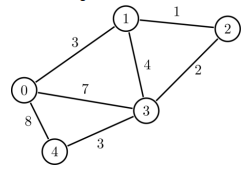

In [3]:
def bfs(graph, source):
  visited = set()
  bfs_traversal = list()
  queue = list()

  queue.append(source)
  visited.add(source)

  while queue:
    current_node = queue.pop(0)
    bfs_traversal.append(current_node)
    
    for neighbor_node in graph[current_node]:
      if neighbor_node not in visited:
        visited.add(neighbor_node)
        queue.append(neighbor_node)
  return bfs_traversal

def main():
  graph = {
    '0': ['1', '3', '4'],
    '1': ['0', '2', '3'],
    '2': ['1', '3'],
    '3': ['1', '2', '3', '4'],
    '4': ['0', '3']
  }

  bfs_traversal = bfs(graph, '0')
  print(f'BFS: {bfs_traversal}')

if __name__=='__main__':
  main()

BFS: ['0', '1', '3', '4', '2']


## Depth First Search (DFS)

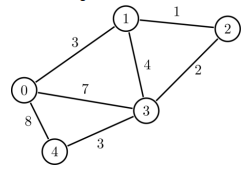

In [5]:
def dfs(graph, source, visited, dfs_traversal):
  if source not in visited:
    dfs_traversal.append(source)
    visited.add(source)

    for neighbor_node in graph[source]:
      dfs(graph, neighbor_node, visited, dfs_traversal)

    return dfs_traversal

def main():
  visited = set()
  dfs_traversal = list()
  graph = {
    '0': ['1', '3', '4'],
    '1': ['0', '2', '3'],
    '2': ['1', '3'],
    '3': ['1', '2', '3', '4'],
    '4': ['0', '3']
  }
  
  print(f"DFS: {dfs(graph, '0', visited, dfs_traversal)}'")

if __name__=='__main__':
  main()

DFS: ['0', '1', '2', '3', '4']'


## Uniform Cost Search (UCS)

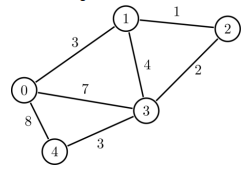

In [1]:
def uniform_cost_search(goal, start):
  global graph, cost
  answer  = []

  queue = []

  for i in range(len(goal)):
    answer.append(10**8)

  queue.append([0, start])

  visited = {}

  count = 0

  while(len(queue)>0):
    queue = sorted(queue)
    p = queue[-1]
    del queue[-1]
    p[0] *= -1
    
    if (p[1] in goal):
      index = goal.index(p[1])
      if (answer[index] == 10**8):
        count += 1
      if (answer[index] > p[0]):
        answer[index] = p[0]

      del queue[-1]

      queue = sorted(queue)
      if(count == len(goal)):
        return answer

    if (p[1] not in visited):
      for i in range(len(graph[p[1]])):
        queue.append([(p[0] +cost[(p[1], graph[p[1]][i])])*-1, graph[p[1]][i]])

    visited[p[1]] = 1

  return answer

if __name__ == '__main__':
  graph,cost = [[]for i in range(8)],{}

  graph[0].append(1)
  graph[0].append(3)
  graph[0].append(4)
  graph[1].append(0)
  graph[1].append(2)
  graph[1].append(3)
  graph[2].append(1)
  graph[2].append(3)
  graph[3].append(0)
  graph[3].append(2)
  graph[3].append(3)
  graph[4].append(0)
  graph[4].append(3)

  cost[(0,1)] = 3
  cost[(1,0)] = 3

  cost[(0,3)] = 7
  cost[(3,0)] = 7

  cost[(0,4)] = 8
  cost[(4,0)] = 8

  cost[(1,3)] = 4
  cost[(3,1)] = 4

  cost[(1,2)] = 1
  cost[(2,1)] = 1

  cost[(3,2)] = 2
  cost[(2,3)] = 2
  
  cost[(3,4)] = 3
  cost[(4,3)] = 3

  goal = []

  goal.append(2)

  answer = uniform_cost_search(goal, 0)

  print("minimum cost from 0 to 2 is = ", answer[0])

minimum cost from 0 to 2 is =  4


## Iterative Deepening Depth First Search

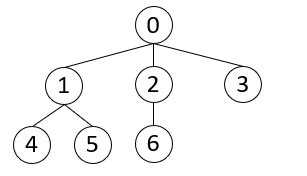

In [14]:
from collections import defaultdict

class Graph:
  def __init__(self, vertices):
    self.v = vertices

    self.graph = defaultdict(list)

  def addEdge(self,u,v):
    self.graph[u].append(v)

  def DLS(self,src,target,maxDepth):
    if src == target : return True

    if maxDepth <= 0 : return False

    for i in self.graph[src]:
      if(self.DLS(i,target,maxDepth-1)):
        return True
    return False

  def IDDFS(self,src, target,maxDepth):
    for i in range(maxDepth):
      if(self.DLS(src,target,i)):
        return True
    return False
  
g = Graph (7);
g.addEdge(0,1)
g.addEdge(0,2)
g.addEdge(0,4)
g.addEdge(1,3)
g.addEdge(1,5)
g.addEdge(2,6)

target = 6; maxDepth = 3; src=0

if g.IDDFS(src,target,maxDepth) == True:
  print ("Target is reachable from source " +"within max depth")
else :
  print ("Target is NOT reachable from source " + "within max depth")

Target is reachable from source within max depth


## Bidirectional Search

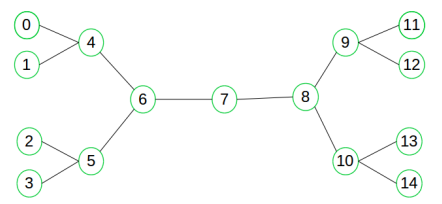

In [15]:
class AdjacentNode:
  def __init__(self,vertex):
    self.vertex = vertex
    self.next = None

class BidirectionalSearch:
  def __init__(self,vertices):
    self.vertices = vertices
    self.graph = [None]* self.vertices

    self.src_queue = list()
    self.dest_queue = list()
    self.src_visited = [False] * self.vertices
    self.dest_visited = [False]* self.vertices
    self.src_parent = [None] * self.vertices
    self.dest_parent = [None] * self.vertices

  def add_edge(self,src,dest):
    node = AdjacentNode(dest)
    node.next = self.graph[src]
    self.graph[src] = node

    node = AdjacentNode(src)
    node.next = self.graph[dest]
    self.graph[dest] = node

  def bfs(self, direction = 'forward'):
    if direction == 'forward':
      current = self.src_queue.pop(0)
      connected_node = self.graph[current]

      while connected_node:
        vertex = connected_node.vertex
        if not self.src_visited[vertex]:
          self.src_queue.append(vertex)
          self.src_visited[vertex] = True
          self.src_parent[vertex] = current

        connected_node = connected_node.next
    else :
      current = self.dest_queue.pop(0)
      connected_node = self.graph[current]

      while connected_node:
        vertex = connected_node.vertex
        if not self.dest_visited[vertex]:
          self.dest_queue.append(vertex)
          self.dest_visited[vertex] = True
          self.dest_parent[vertex] = current

        connected_node = connected_node.next

  def is_intersecting (self):
    for i in range(self.vertices):
      if (self.src_visited[i] and self.dest_visited[i]):
        return i

    return -1

  def print_path(self, intersecting_node, src, dest):
    path = list()
    path.append(intersecting_node)
    i = intersecting_node

    while i != src:
      path.append(self.src_parent[i])
      i = self.src_parent[i]

    path = path [::-1]
    i = intersecting_node

    while i != dest:
      path.append(self.dest_parent[i])
      i = self.dest_parent[i]

    print ("*******path*******")
    path = list(map(str, path))

    print(' '.join(path))

  def bidirectional_search(self,src,dest):
    self.src_queue.append(src)
    self.src_visited[src] = True
    self.src_parent[src] = -1

    self.dest_queue.append(dest)
    self.dest_visited[dest] = True
    self.dest_parent[dest] = -1
    
    while self.src_queue and self.dest_queue:
      self.bfs(direction = 'forward')
    
    self.bfs(direction = 'backward')

    intersecting_node = self.is_intersecting()

    if intersecting_node != -1:
      print(f"Path exists between {src} and {dest}")
      print(f"Intersection at : {intersecting_node}")
      self.print_path(intersecting_node,src,dest)
      exit(0)
    return -1

if __name__== '__main__':
  n = 15
  src = 0
  dest = 6
  graph = BidirectionalSearch(n)
  graph.add_edge(0,4)
  graph.add_edge(1,4)
  graph.add_edge(2,5)
  graph.add_edge(3,5)
  graph.add_edge(4,6)
  graph.add_edge(5,6)
  graph.add_edge(6,7)
  graph.add_edge(7,8)
  graph.add_edge(8,9)
  graph.add_edge(8,10)
  graph.add_edge(9,11)
  graph.add_edge(9,12)
  graph.add_edge(10,13)
  graph.add_edge(10,14)

  out = graph.bidirectional_search(src,dest)

  if out == -1:
    print(f"Path does not exist between {src} and {dest}")

Path exists between 0 and 6
Intersection at : 4
*******path*******
0 4 6
Path does not exist between 0 and 6
